In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('Social_Network_Ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.dtypes

,0
User ID,int64
Gender,object
Age,int64
EstimatedSalary,int64
Purchased,int64


In [5]:
data.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


<Axes: xlabel='Purchased', ylabel='Age'>

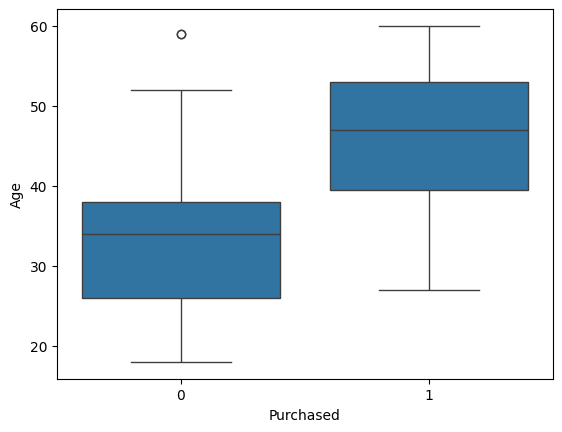

In [6]:
sns.boxplot(data=data,y='Age',x='Purchased')

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

data['Gender']=encoder.fit_transform(data['Gender'])
data['Purchased']=encoder.fit_transform(data['Purchased'])

In [8]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

data['Age']=scaler.fit_transform(data[['Age']])
data['EstimatedSalary']=scaler.fit_transform(data[['EstimatedSalary']])

In [10]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,0.023810,0.029630,0
1,15810944,1,0.404762,0.037037,0
2,15668575,0,0.190476,0.207407,0
3,15603246,0,0.214286,0.311111,0
4,15804002,1,0.023810,0.451852,0


In [11]:
data.drop('User ID',axis=1,inplace=True)

In [12]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,0.023810,0.029630,0
1,1,0.404762,0.037037,0
2,0,0.190476,0.207407,0
3,0,0.214286,0.311111,0
4,1,0.023810,0.451852,0


In [13]:
from sklearn.model_selection import train_test_split

X=data.drop('Purchased',axis=1)
y=data['Purchased']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [15]:
y_pred=model.predict(X_test)

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

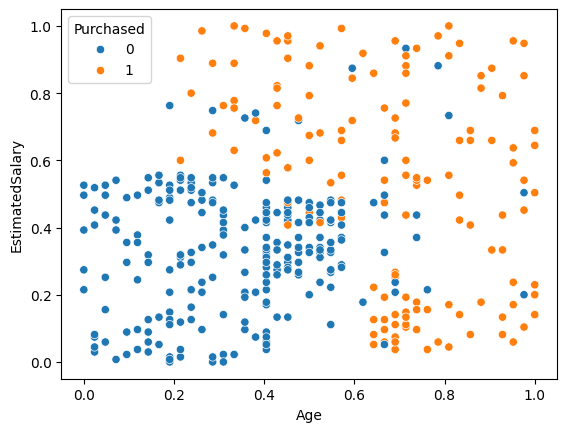

In [16]:
sns.scatterplot(data=data,x='Age',y='EstimatedSalary',hue='Purchased')

In [20]:
# Term | Meaning | Example
# TP (True Positive) | Model predicted Positive, and it was actually Positive | Model says “yes” → actual is “yes”
# TN (True Negative) | Model predicted Negative, and it was actually Negative | Model says “no” → actual is “no”
# FP (False Positive) | Model predicted Positive, but it was actually Negative | Model says “yes” → actual is “no” (Type I Error)
# FN (False Negative) | Model predicted Negative, but it was actually Positive | Model says “no” → actual is “yes” (Type II Error)

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[51  1]
 [ 9 19]]


In [27]:
a=cm.shape

corr=0
incorr=0

for row in range(a[0]):
  for col in range(a[1]):
    if(row==col):
      corr+=cm[row][col]
    else:
      incorr+=cm[row][col]
print("Correct Predicted : ",corr)
print("Incorrected Predicted : ",incorr)
print("Accuracy : ",corr/(corr+incorr))

tp=cm[0][0]
tn=cm[1][1]
fp=cm[1][0]
fn=cm[0][1]

print("Recall : ",tp/(tp+fn))
print("Precision : ",tp/(tp+fp))
print("Accuracy : ",(tp+tn)/(tp+tn+fp+fn))

Correct Predicted :  70
Incorrected Predicted :  10
Accuracy :  0.875
Recall :  0.9807692307692307
Precision :  0.85
Accuracy :  0.875
